<a href="https://colab.research.google.com/github/nusco/seven_milestones/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 2: Linear Regression

First, let's import all the libraries we need:

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
X, Y = np.loadtxt("ice_cream_data.txt", skiprows=1, unpack=True)

In [92]:
print("Temperature    Ice Creams")
for x, y in zip(X, Y):
    print("    {0:>2}             {0:>2}".format(int(x), int(y)))

Temperature    Ice Creams
     8              8
    11             11
    11             11
    14             14
    14             14
    16             16
    16             16
    17             17
    17             17
    19             19
    19             19
    19             19
    20             20
    20             20
    21             21
    22             22
    22             22
    22             22
    23             23
    23             23
    24             24
    26             26
    26             26
    26             26
    27             27
    28             28
    30             30
    31             31
    33             33
    35             35


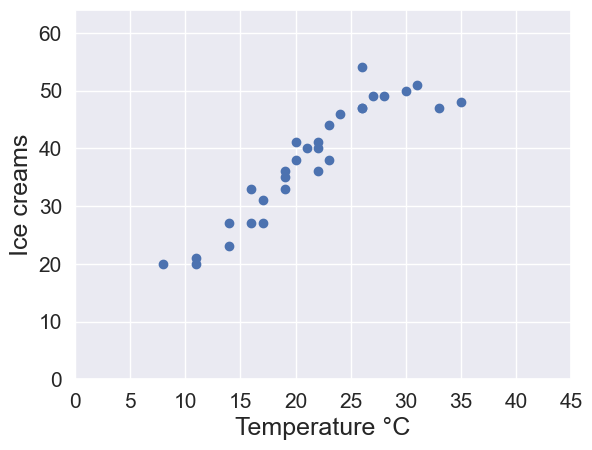

In [69]:
# TODO: is this useful?
%matplotlib inline

sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Temperature °C", fontsize=18)
plt.ylabel("Ice creams", fontsize=18)
x_edge, y_edge = X.max() + 10, Y.max() + 10
plt.axis([0, x_edge, 0, y_edge])
#plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.show()

In [70]:
def predict(X, w, b):
    return X * w + b

def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))

# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))


Iteration    0 => Loss: 1538.833333
Iteration    1 => Loss: 1521.501713
Iteration    2 => Loss: 1504.269520
Iteration    3 => Loss: 1487.136753
Iteration    4 => Loss: 1470.103413
Iteration    5 => Loss: 1453.169500
Iteration    6 => Loss: 1436.335013
Iteration    7 => Loss: 1419.599953
Iteration    8 => Loss: 1402.964320
Iteration    9 => Loss: 1386.428113
Iteration   10 => Loss: 1369.991333
Iteration   11 => Loss: 1353.653980
Iteration   12 => Loss: 1337.416053
Iteration   13 => Loss: 1321.277553
Iteration   14 => Loss: 1305.238480
Iteration   15 => Loss: 1289.298833
Iteration   16 => Loss: 1273.458613
Iteration   17 => Loss: 1257.717820
Iteration   18 => Loss: 1242.076453
Iteration   19 => Loss: 1226.534513
Iteration   20 => Loss: 1211.092000
Iteration   21 => Loss: 1195.748913
Iteration   22 => Loss: 1180.505253
Iteration   23 => Loss: 1165.361020
Iteration   24 => Loss: 1150.316213
Iteration   25 => Loss: 1135.370833
Iteration   26 => Loss: 1120.524880
Iteration   27 => Loss: 1105

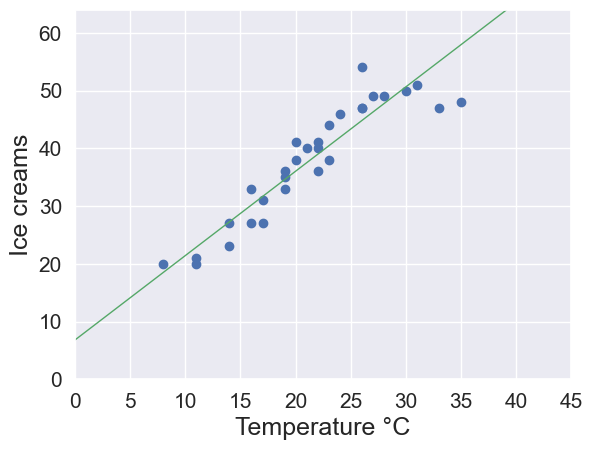

In [71]:
sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Temperature °C", fontsize=18)
plt.ylabel("Ice creams", fontsize=18)
x_edge, y_edge = X.max() + 10, Y.max() + 10
plt.axis([0, x_edge, 0, y_edge])

plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")

plt.show()

## Your Turn

optional exercise: play with hyperparameters

go in _train()_ and change _lr_

try a very small value
then a very large value

(result: large learning rate, such as 1, results in a fast but imprecise algorithm. small learning rates, such as 0.00001, result in very precise but very slow algorithm. 10000
iterations are not enough. it takes 1.5M+ iterations!)

that's why I picked 0.01